Import packages

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Analysing data


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

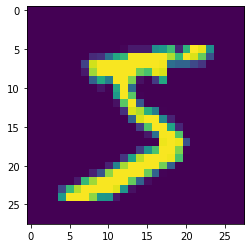

In [6]:
plt.imshow(X_train[0])

Data Preprocessing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model creating

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.2281 - accuracy: 0.9542 - val_loss: 0.0796 - val_accuracy: 0.9768
Epoch 2/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0666 - accuracy: 0.9797 - val_loss: 0.0946 - val_accuracy: 0.9725
Epoch 3/5
1875/1875 [==============================] - 198s 106ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0768 - val_accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.1061 - val_accuracy: 0.9746
Epoch 5/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.1232 - val_accuracy: 0.9740


Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.12324101477861404, 0.9739999771118164]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 116ms/step
[[6.34080635e-11 1.04355535e-14 4.21453067e-10 3.61752006e-09
  1.54722562e-13 2.49128235e-12 1.00082708e-17 1.00000000e+00
  3.87317706e-10 7.47010287e-10]
 [4.76852779e-09 2.42018956e-08 9.99999881e-01 7.91838133e-08
  2.56636107e-16 2.14762104e-14 5.35601572e-08 4.09362892e-14
  6.27745772e-12 2.72507304e-14]
 [1.43817458e-09 9.99987364e-01 1.12625820e-08 1.21446690e-13
  1.14980267e-05 6.62002776e-07 6.13008699e-10 6.15700893e-12
  3.14522225e-07 2.55991737e-14]
 [1.00000000e+00 5.73493366e-19 1.15336329e-09 1.08379740e-15
  3.33755439e-15 5.64404218e-11 1.52411594e-09 6.86416442e-17
  1.42457541e-12 1.89820093e-09]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
